In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)

In [2]:
from PIL import Image

In [3]:
im = Image.open("./lk.jpg")

In [4]:
im_array = np.asarray(im)

In [5]:
im_array.shape

(493, 700, 3)

In [6]:
rank = 150
compress_im_array = np.zeros_like(im_array)

In [7]:
for i in range(3):
    u, sigma, v = np.linalg.svd(im_array[:, :, i])
    compress_im_array[:, :, i] = u[:, :rank] @ np.diagflat(sigma[:rank]) @ v[:rank, :]

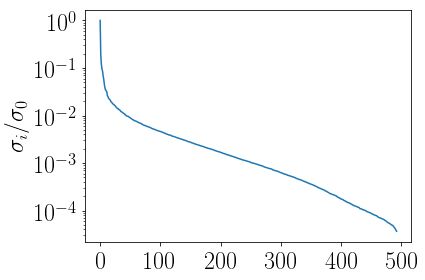

In [8]:
plt.semilogy(sigma / sigma[0])
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylabel(r"$\sigma_i/ \sigma_0$", fontsize=24)
plt.tight_layout()
plt.savefig("./sing_vals.pdf", format="pdf")

In [9]:
compress_im = Image.fromarray(np.uint8(compress_im_array))

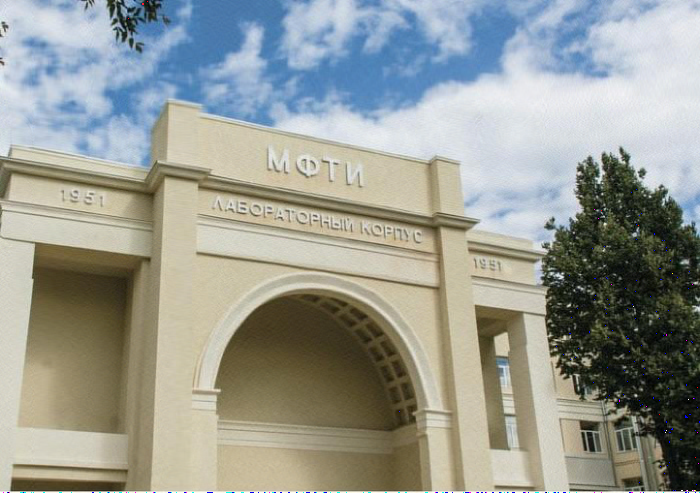

In [10]:
compress_im

In [11]:
compress_im.save("lk_k{}.jpg".format(rank))